# **Muhamad Anwar**
# Task-02
# Prediction using Unsupervised ML

**Step 1: Importing necessary libraries**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

**Step 2: Loading famous IRIS dataset**

In [9]:
# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data

# Create a DataFrame from the data
iris_df = pd.DataFrame(data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Step 3: Scaling data for best fit**

In [12]:
# Feature scaling (optional)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(data_scaled, columns=iris.feature_names)

# Display the first few rows of the scaled DataFrame
display(scaled_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**Step 4: Determining the optimality using Elbow method by visualization**

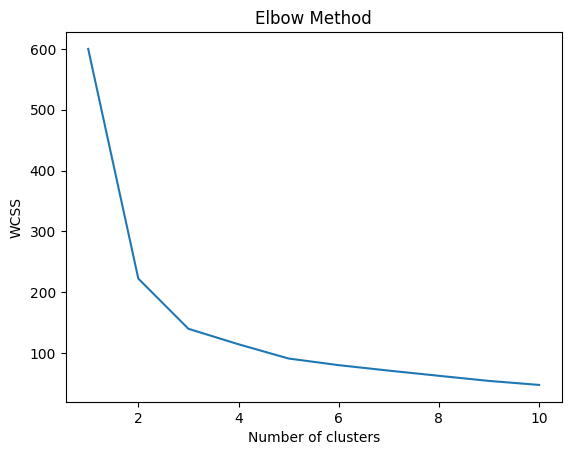

In [13]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Step 5: Selecting optimal no of clusters**

In [14]:
# Choose the optimal number of clusters (e.g., from the plot)
optimal_clusters = 3

**Step 6: Applying K-Means Clustering Algorithm**

In [15]:
# Apply KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

**Step 7: Visualizing the clusters for both features using Matplotlib**

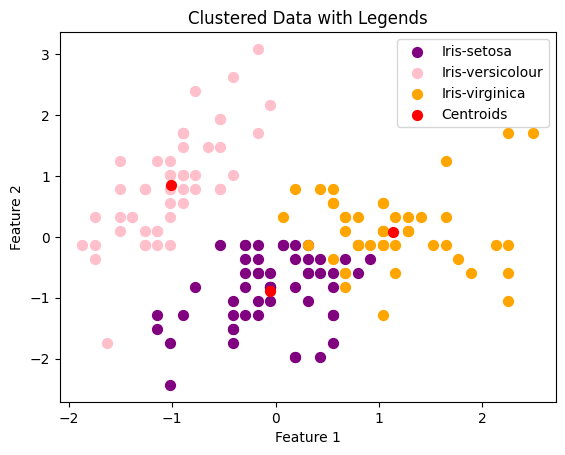

In [29]:
# Visualize the clusters with legends
plt.scatter(data_scaled[cluster_labels == 0, 0], data_scaled[cluster_labels == 0, 1], label='Iris-setosa', c='purple', s=50)
plt.scatter(data_scaled[cluster_labels == 1, 0], data_scaled[cluster_labels == 1, 1], label='Iris-versicolour', c='pink', s=50)
plt.scatter(data_scaled[cluster_labels == 2, 0], data_scaled[cluster_labels == 2, 1], label='Iris-virginica', c='orange', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

# Add labels, title, and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data with Legends')
plt.legend()

# Show the plot
plt.show()


**Step 8: Calculating Silhoutte Score for Cluster Quality Assessment**

In [22]:
# Compute the silhouette score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.46
